In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#### 3.1. Load Data:

Complete the followed cell for data loading. 
In this cell you have to normalize, split and shuffle data for learning.

In [2]:

##################################################################################
# Use 'torchvision.datasets.FashionMNIST' class for loading FashionMNIST   #
# dataset. This dataset has 50000 data for training and 10000 data for test      #
# and every data has shape (1*28*28).                                            #
# Also Use 'torchvision.transforms.Compose' for common image transformations     #
# such as normalization and use 'torch.utils.data.DataLoader' class that it      #
# represents a Python iterable over a dataset and divides data to Batches.       #
# Then Split data into 3 part: Train, Validation and Test. Finally,              #
# save iterable data in 'trainloader', 'validationloader', 'testloader'.         #
##################################################################################

train_set = torchvision.datasets.FashionMNIST(
    "./data",
    download = True,
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))

test_set = torchvision.datasets.FashionMNIST(
    "./data",
    download=True,
    train=False,
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))



training_data_train, training_data_validation = torch.utils.data.random_split(train_set, (50000, 10000))

batch_size_train = 128
batch_size_test =  128

trainloader = torch.utils.data.DataLoader(train_set,batch_size_train) #(train_set, batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set,batch_size_test)    #(test_set, batch_size, shuffle=True)
validationloader = torch.utils.data.DataLoader(training_data_validation, batch_size_train) #(validation, batch_size, shuffle=True)



classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.6%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



119.3%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



#### 3.2. Load Data Test:

In [3]:
############################################################
# Run the following code an check the size of each batch   #
############################################################
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
print('The size and type of each batch in ''trainloader'' is:')
print(example_data.size())
print(type(example_data))
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print('\nThe size and type of each batch in ''testloader'' is:')
print(example_data.size())
print(type(example_data))

The size and type of each batch in trainloader is:
torch.Size([128, 1, 28, 28])
<class 'torch.Tensor'>

The size and type of each batch in testloader is:
torch.Size([128, 1, 28, 28])
<class 'torch.Tensor'>


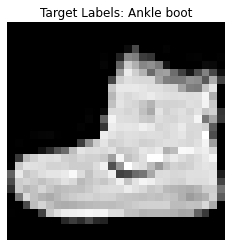

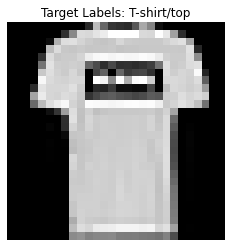

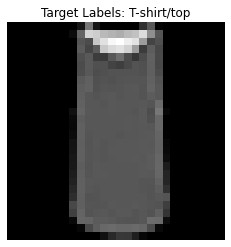

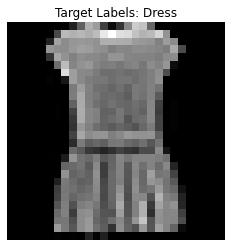

In [4]:
#####################################################################
# Run the following code and see some of the samples in the dataset #
#####################################################################

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images:
for i in range(4):
    img=torchvision.utils.make_grid(images[i])
    ###########################################################
    #  If you normalize data , here unnormalize them to see   # 
    #  them clear .                                            #
    ###########################################################
    m=0.5
    s=0.5
    img = img*s + m    # unnormalize
    ###########################################################
    #                   End of your code                      #
    ###########################################################
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2, 0)))
    plt.title("Target Labels: {}".format(classes[labels[i]]))
    plt.axis('off')
    plt.show()
   

#### 3.3. Network Design:
Design the layer of your network and select proper hyperparameter. 



In [5]:
######################################################################
# Use 'torch.nn' module to design your network for CIFAR-10    #
# classification. You have to implement the structure of MLP for it. #
# In your design you don't have any limitation and you can use       #
# Batch-norm layers, Drop-out layers and etc for generalization      #
# improvement (if needed). Use classes and modules from 'torch.nn'.  #
# In the following code, the 'MLP' class is your MLP network and     #
# this class is inherited from nn.Module, so you can benefit         #
# properties of the 'nn.Module'.You may complete '__init__()'        #
# constructor by some classes like 'nn.ReLU()' or 'nn.Linear()'      #
# to use them in the forward pass of your network.                   #
######################################################################
  
class MLP(nn.Module):
    def __init__(self, hidden_dim=150, keep_prob = 0.2):
        super(MLP, self).__init__()
        # todo
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 10),
        )
        # pass

    def forward(self, x):
        # todo
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        # pass
        return out

######################################################################
#                          End of your code                          #
######################################################################

#### 3.4. Optimization Algorithm:

In [6]:
#############################################################################
#                                                                  #
# 1- use classification cross-entropy loss                                  #
# 2- use 'torch.optim' module for optimization                              #
# 3- select optimization algorithm and its hyperparameter                   #
#############################################################################
net = MLP()
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), learning_rate) 
#############################################################################
#                             End of your code                              #
#############################################################################

#### 3.5. Training:
You have to tweak `hidden_dim`, `leanirng_rate`, `weight_scale`, `num_epochs` and `reg` and etc to get a validation accuracy above 50%.

In [7]:
#######################################################
# Feed the inputs data to the MLP network and   #
# optimize Cross-Entropy loss by using target labels. #
# Then update weights and biases.                     #
#######################################################
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs=25
num_batchs = len(trainloader)
for epoch in range(num_epochs):
    total_train=0
    correct_train=0
    running_loss = 0.0
    for batch, data in enumerate(trainloader, 0):
        inputs, labels = data
        # zero the parameter gradients:
        optimizer.zero_grad()

        # forward pass:
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # backward pass:
        loss.backward()

        # optimization:
        optimizer.step()
        #############################################
        #           End of your code                #
        #############################################
        

        # Results: 
        running_loss += loss.item()

        total_train += labels.size(0)
        _, predicted_train = torch.max(outputs.data, 1)
        correct_train += (predicted_train == labels.to(device)).sum().item()

        if batch % (num_batchs/10) == ((num_batchs/10) -1):
            print('[Batch %d / %d] loss: %.3f' %
                  (batch + 1, num_batchs, running_loss / (num_batchs/10)))
            running_loss = 0.0
            torch.save(net.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validationloader:
            images, labels = data
            outputs = net(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()
    val_acc = correct / total
    train_acc = correct_train / total_train
    print('(Epoch %d / %d) train acc: %.2f%%; val_acc: %.2f%%' % (
          epoch+1, num_epochs, 100*train_acc, 100*val_acc))

(Epoch 1 / 25) train acc: 71.77%; val_acc: 80.52%
(Epoch 2 / 25) train acc: 82.08%; val_acc: 83.45%
(Epoch 3 / 25) train acc: 84.00%; val_acc: 84.83%
(Epoch 4 / 25) train acc: 85.05%; val_acc: 85.74%
(Epoch 5 / 25) train acc: 85.84%; val_acc: 86.42%
(Epoch 6 / 25) train acc: 86.41%; val_acc: 86.91%
(Epoch 7 / 25) train acc: 86.88%; val_acc: 87.33%
(Epoch 8 / 25) train acc: 87.25%; val_acc: 87.78%
(Epoch 9 / 25) train acc: 87.57%; val_acc: 88.01%
(Epoch 10 / 25) train acc: 87.81%; val_acc: 88.23%
(Epoch 11 / 25) train acc: 88.09%; val_acc: 88.53%
(Epoch 12 / 25) train acc: 88.32%; val_acc: 88.72%
(Epoch 13 / 25) train acc: 88.54%; val_acc: 88.91%
(Epoch 14 / 25) train acc: 88.71%; val_acc: 89.03%
(Epoch 15 / 25) train acc: 88.89%; val_acc: 89.21%
(Epoch 16 / 25) train acc: 89.08%; val_acc: 89.50%
(Epoch 17 / 25) train acc: 89.25%; val_acc: 89.76%
(Epoch 18 / 25) train acc: 89.42%; val_acc: 89.86%
(Epoch 19 / 25) train acc: 89.58%; val_acc: 90.03%
(Epoch 20 / 25) train acc: 89.72%; val_a

#### 3.6. Test: 
Run the following cell and test your network.

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
test_acc = correct / total
print('Accuracy of the network on the test images: %2f %%' % (100 * test_acc ))

Accuracy of the network on the test images: 87.760000 %


In [9]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(device)).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 83 %
Accuracy of Trouser : 94 %
Accuracy of Pullover : 67 %
Accuracy of Dress : 82 %
Accuracy of  Coat : 75 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 48 %
Accuracy of Sneaker : 100 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot : 96 %
